In [9]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline


In [10]:
raw_data = pd.read_csv('data/us-census-demographic-data/acs2015_census_tract_data.csv', engine='python')

raw_data.head()

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


In [11]:
df = raw_data

df.shape

(74001, 37)

In [12]:
df.columns

Index(['CensusTract', 'State', 'County', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [13]:
data = df.iloc[:, 3:]

data.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1948,940,1008,0.9,87.4,7.7,0.3,0.6,0.0,1503,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,2156,1059,1097,0.8,40.4,53.3,0.0,2.3,0.0,1662,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,2968,1364,1604,0.0,74.5,18.6,0.5,1.4,0.3,2335,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,4423,2172,2251,10.5,82.8,3.7,1.6,0.0,0.0,3306,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,10763,4922,5841,0.7,68.5,24.8,0.0,3.8,0.0,7666,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


In [14]:
data = data.dropna()

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72727 entries, 0 to 74000
Data columns (total 34 columns):
TotalPop           72727 non-null int64
Men                72727 non-null int64
Women              72727 non-null int64
Hispanic           72727 non-null float64
White              72727 non-null float64
Black              72727 non-null float64
Native             72727 non-null float64
Asian              72727 non-null float64
Pacific            72727 non-null float64
Citizen            72727 non-null int64
Income             72727 non-null float64
IncomeErr          72727 non-null float64
IncomePerCap       72727 non-null float64
IncomePerCapErr    72727 non-null float64
Poverty            72727 non-null float64
ChildPoverty       72727 non-null float64
Professional       72727 non-null float64
Service            72727 non-null float64
Office             72727 non-null float64
Construction       72727 non-null float64
Production         72727 non-null float64
Drive            

In [28]:
from sklearn import neighbors
from sklearn.model_selection import cross_val_score

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=15)
X = data.drop(['Unemployment'], axis=1)
Y = data.Unemployment
knn.fit(X, Y)

from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=30)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


Unweighted Accuracy: 0.37 (+/- 0.26)


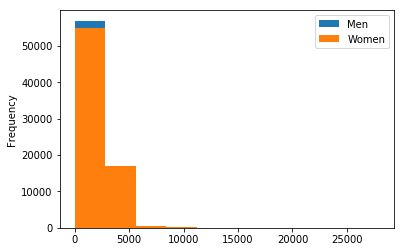

In [16]:
import matplotlib.pyplot as plt

data[['Men', 'Women']].plot.hist()
plt.show()

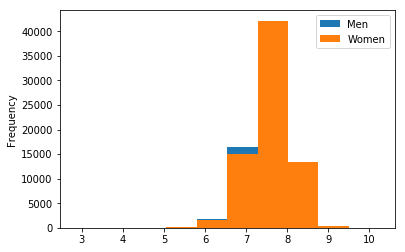

In [17]:
np.log(data[['Men', 'Women']]+1).plot.hist()
plt.show()

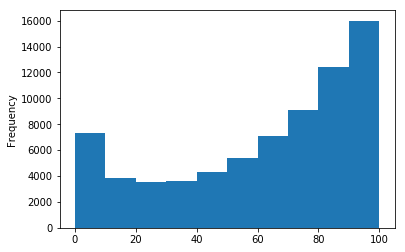

In [18]:
data['White'].plot.hist()
plt.show()

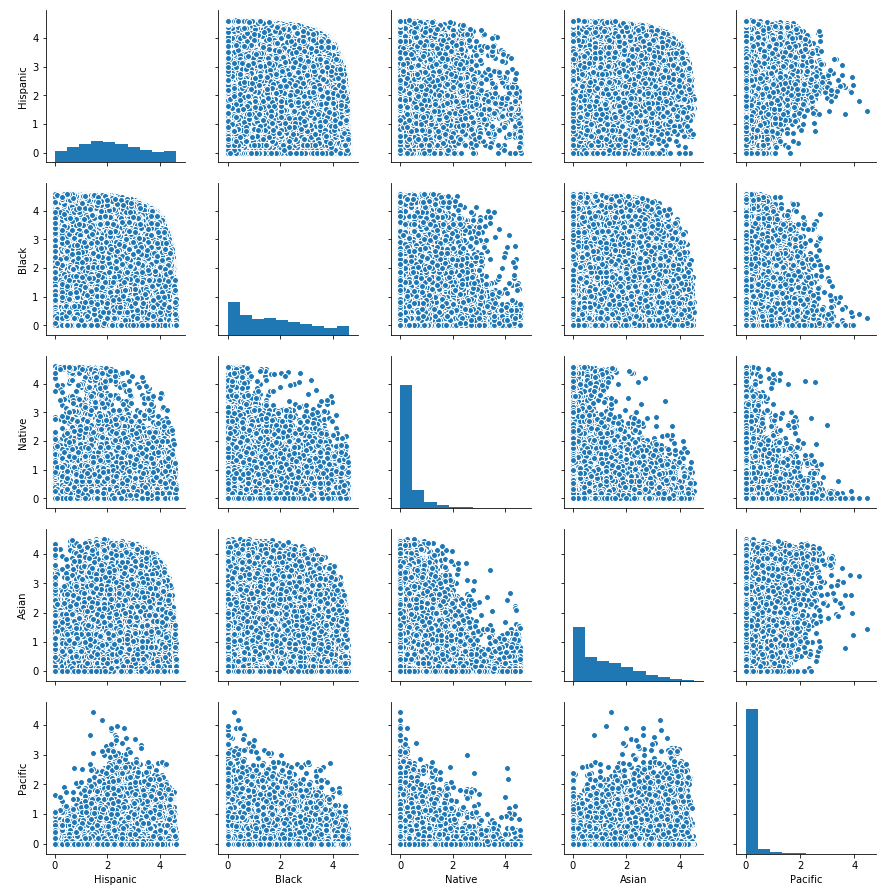

In [19]:
import seaborn as sns

g = sns.pairplot(np.log(data[['Hispanic', 'Black', 'Native',
       'Asian', 'Pacific']]+1))

In [20]:
data = np.log(data+1)

In [24]:
from sklearn import linear_model
# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="seaborn", message="^internal gelss gelsd")

lr = linear_model.LinearRegression()
y = data.Unemployment.values.reshape(-1, 1)
X = data.drop(['Unemployment'], axis=1)

# Instantiate our model.
lr = linear_model.LinearRegression()

# Fit our model to our data.
lr.fit(X, y)

# Inspect the results.
print('\nCoefficients: \n', lr.coef_)
print('\nIntercept: \n', lr.intercept_)
print('\nR-squared:')
print(lr.score(X, y))


Coefficients: 
 [[-3.27113915e+00  1.73015329e+00  1.87834282e+00  2.65038091e-02
  -3.89089734e-02  4.52968482e-02  1.96991255e-02  2.25587189e-02
  -8.86512889e-03  4.78067369e-01  3.26201870e-02  7.03151601e-03
  -1.57171310e-01  1.74510144e-02  1.74055371e-01 -7.74140216e-03
  -6.79028206e-02  8.99278230e-02  3.46433569e-02 -1.67219394e-02
   4.00792971e-02  1.22014022e-01  2.88074616e-02  5.08982445e-02
  -1.01400343e-03  1.97707498e-02  3.16050584e-03  2.70276087e-01
  -8.08478281e-01  7.09484743e-02 -2.16570465e-02 -1.26160059e-02
  -3.06996399e-02]]

Intercept: 
 [2.74441654]

R-squared:
0.5160248912788087


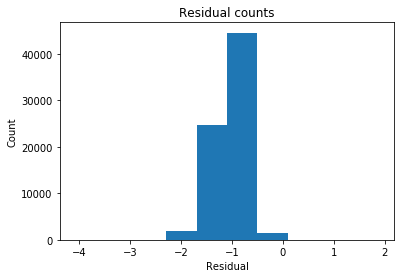

In [25]:
# Extract predicted values.
predicted = lr.predict(X).ravel()
actual = np.log(data.Unemployment+1)

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

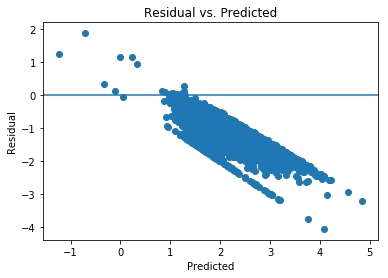

In [26]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

- Although R^2 is high for OLS, Residuals are not homscedastic
- KNN gives a good estimate, but is time consuming